In [3]:
import pandas as pd
import numpy as np

In [5]:
loandata_set=pd.read_csv(r"F:\project.py\data set predection\Loan Approval prediction\loan data.csv")
loandata_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,2.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
loandata_set.head

<bound method NDFrame.head of       Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No         0.0      Graduate            No   
610  LP002979    Male     Yes         2.0      Graduate            No   
611  LP002983    Male     Yes         1.0      Graduate            No   
612  LP002984    Male     Yes         2.0      Graduate            No   
613  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849

In [11]:
loandata_set.shape

(614, 13)

In [5]:
loandata_set.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No         0.0      Graduate            No   
610  LP002979    Male     Yes         2.0      Graduate            No   
611  LP002983    Male     Yes         1.0      Graduate            No   
612  LP002984    Male     Yes         2.0      Graduate            No   
613  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               

In [6]:
loandata_set.fillna(method='ffill', inplace=True)


C:\Users\gokul\AppData\Local\Temp\ipykernel_9652\2529295438.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  loandata_set.fillna(method='ffill', inplace=True)


In [7]:
x=loandata_set[["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,2.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [8]:
y=loandata_set["Loan_Status"]
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [9]:
x["Gender"] = x["Gender"].map({"Male": 0, "Female": 1})
x["Married"] = x["Married"].map({"Yes": 1, "No": 0})
x["Education"] = x["Education"].map({"Graduate": 1, "Not Graduate": 0})
x["Self_Employed"] = x["Self_Employed"].map({"No": 0, "Yes": 1})
x["Property_Area"] = x["Property_Area"].map({"Urban": 2, "Semiurban": 1, "Rural": 0})

# Fill missing numeric values with mean
x = x.fillna(x.select_dtypes(include=['number']).mean())


C:\Users\gokul\AppData\Local\Temp\ipykernel_9652\1039484393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].map({"Male": 0, "Female": 1})
C:\Users\gokul\AppData\Local\Temp\ipykernel_9652\1039484393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Married"] = x["Married"].map({"Yes": 1, "No": 0})
C:\Users\gokul\AppData\Local\Temp\ipykernel_9652\1039484393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [36]:
# decision tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier                         # decision tree

model = DecisionTreeClassifier()
model.fit(x, y)

print("\nPlease enter the applicant details for loan prediction:")

gender = input("Enter gender (Male/Female): ").strip().title()
married = input("Married? (Yes/No): ").strip().title()
dependents = input("Number of dependents (0/1/2/3+): ").strip()
education = input("Education (Graduate/Not Graduate): ").strip().title()
self_employed = input("Self-employed? (Yes/No): ").strip().title()
applicant_income = float(input("Enter applicant income: "))
coapplicant_income = float(input("Enter coapplicant income: "))
loan_amount = float(input("Enter loan amount: "))
loan_amount_term = float(input("Enter loan amount term: "))
credit_history = int(input("Enter credit history (1 = good, 0 = bad): "))
property_area = input("Property area (Urban/Semiurban/Rural): ").strip().title()

# --- Encoding User Input ---
gender = 0 if gender == "Male" else 1
married = 1 if married == "Yes" else 0
education = 1 if education == "Graduate" else 0
self_employed = 1 if self_employed == "Yes" else 0
property_area = {"Rural": 0, "Semiurban": 1, "Urban": 2}.get(property_area, -1)
dependents = 3 if dependents == "3+" else int(dependents)

# --- Prediction ---
if property_area == -1:
    print("Invalid property area entered.")
else:
    user_data = [[
        gender, married, dependents, education, self_employed,
        applicant_income, coapplicant_income, loan_amount,
        loan_amount_term, credit_history, property_area
    ]]

    prediction = model.predict(user_data)
    result = "Approved ✅" if prediction[0] == 1 else "Rejected ❌"
    print("\nLoan Status Prediction:", result)



Please enter the applicant details for loan prediction:


Enter gender (Male/Female):  female
Married? (Yes/No):  no
Number of dependents (0/1/2/3+):  3
Education (Graduate/Not Graduate):  not graduate
Self-employed? (Yes/No):  no
Enter applicant income:  40000
Enter coapplicant income:  6000
Enter loan amount:  70000
Enter loan amount term:  4000
Enter credit history (1 = good, 0 = bad):  0
Property area (Urban/Semiurban/Rural):  urban



Loan Status Prediction: Approved ✅


C:\Users\gokul\Downloads\New folder\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


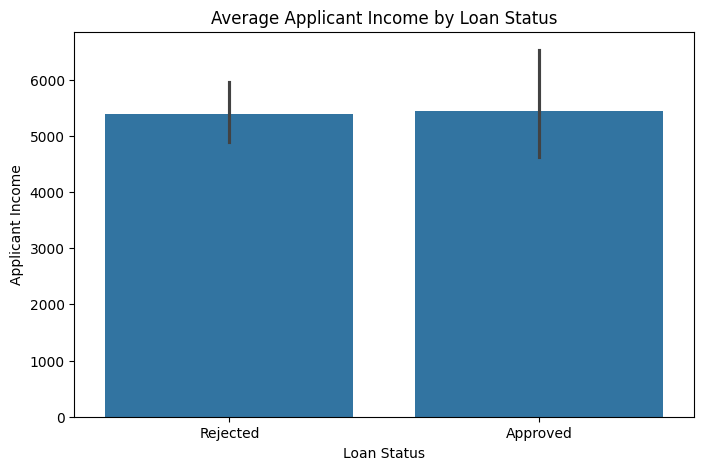

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of average income based on loan approval
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=loandata_set)
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.title('Average Applicant Income by Loan Status')
plt.ylabel('Applicant Income')
plt.xlabel('Loan Status')
plt.show()


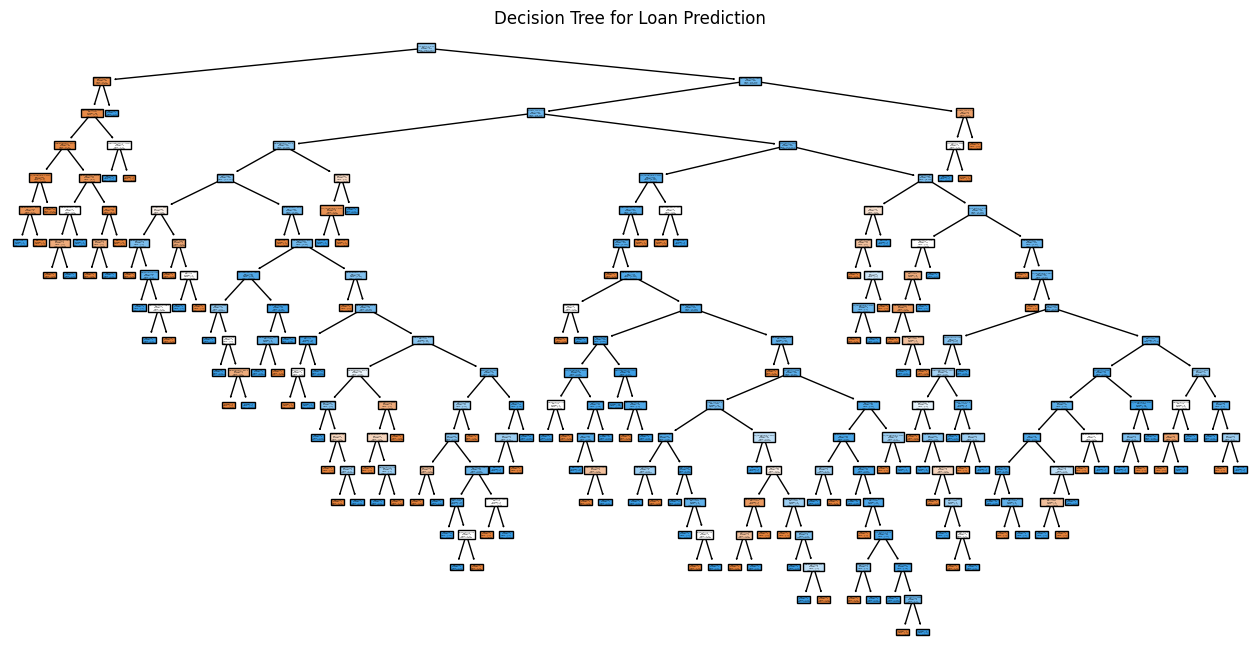

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=["Rejected", "Approved"])
plt.title("Decision Tree for Loan Prediction")
plt.show()
